In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 90

2023-05-04 15:11:19.955631: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def split_reshape(X, y, window_size, predict_size):
    """reshape data to make sure it can predict 5 days"""
    """split data to training dand testing data"""
    data_in = []
    data_out = []
    for i in range(X.shape[0] - window_size - predict_size):
        data_in.append(X[i:i+window_size])
        data_out.append(y[i+window_size:i+window_size+predict_size])
    data_in = np.array(data_in)
    data_out = np.array(data_out)
    train_X = data_in[:1256]
    test_X = data_in[1257:]
    train_y = data_out[:1256]
    test_y = data_out[1257:]
    return train_X, train_y, test_X, test_y

# train_X, train_y, test_X, test_y = split_reshape(X=X, y=y_norm, window_size=window_size, predict_size=predict_size)

In [3]:
# Build RNN model
def rnn_model(X, y, batch_size, epoch, window_size, predict_size):
    """The definition for SimpleRNN"""
    
    # split and reshape dataset to train data and test data
    train_X, train_y, test_X, test_y = split_reshape(X=X, y=y_norm, window_size=window_size, predict_size=predict_size)
    
    model = Sequential() # Sequential provides training and inference features on this model.
    
    # Fully-connected RNN where the output is to be fed back to input.
    model.add(SimpleRNN(units=64, activation='sigmoid', input_shape=(window_size, train_X.shape[2]), return_sequences=False))
    model.add(Dropout(0.1)) # The dropout layer helps helps preventing overfitting
    model.add(Dense(5, activation='sigmoid'))

    # Define cost function: MSE
    model.compile(loss='mean_squared_error', optimizer='adam') # Optimizer that implements the Adam algorithm
    model.summary() # Prints a string summary of the network.

    # Trains the model for a fixed number of epochs
    model.fit(train_X, train_y, batch_size=batch_size, epochs=epoch)
    
    preds = model.predict(np.vstack((train_X,test_X))) # using the whole dataset to predict
    preds_test = model.predict(test_X) # using test set to predict
    #preds_test = model.predict(preds) # using whole data set to predict
    
    return test_y, preds, preds_test

In [4]:
df = pd.read_csv("updated_PCA.csv") # Read features after PCA
features_diff = df.iloc[:1508, 1:] # Features with the diff price
features_diff = np.array(features_diff)
features = df.iloc[:1509, 1:]
features = np.array(features) # Features with origin price

# Normalized
for i in range(features.shape[1]):
    features[:, i] = MinMaxScaler().fit_transform(features[:,i].reshape(-1,1)).flatten()
for i in range(features_diff.shape[1]):
    features_diff[:, i] = MinMaxScaler().fit_transform(features_diff[:,i].reshape(-1,1)).flatten()

In [5]:
pfizer = pd.read_csv("originy.csv")
price = pfizer["Close Pfizer"]

# diff
diff_price = np.array(price.diff().dropna()).reshape(-1,1)
# normalize
scaler = MinMaxScaler()
diff_normal_price = scaler.fit_transform(diff_price)
normal_price = scaler.fit_transform(np.array(price).reshape(-1,1))

In [108]:
# Predict the diff
window_size = 30 # update to observe 20 data point
predict_size = 5
batch_size = 32
epoch = 1000
y_norm = diff_normal_price # predict the diff price
X = features_diff
X = np.hstack((y_norm,X))
test_y, preds, preds_test = rnn_model(X=X, y=y_norm, batch_size=batch_size, epoch=epoch, window_size=window_size, predict_size=predict_size)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 64)                5504      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 5,829
Trainable params: 5,829
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
40/40 [==============================] - 2s 8ms/step - loss: 0.0108
Epoch 2/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.0089
Epoch 3/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 4/1000
40/40 [==============================] - 0s 8ms/step - loss:

40/40 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 92/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 93/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 94/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 95/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 96/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 97/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 98/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 99/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 100/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 101/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 102/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 103/1000
40/40 [=====

Epoch 190/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 191/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 192/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 193/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0062
Epoch 194/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0062
Epoch 195/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 196/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 197/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 198/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0062
Epoch 199/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 200/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 201/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0062
Epoc

40/40 [==============================] - 0s 6ms/step - loss: 0.0061
Epoch 387/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 388/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 389/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 390/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 391/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 392/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 393/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 394/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 395/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 396/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 397/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 398/1000
40/4

40/40 [==============================] - 0s 7ms/step - loss: 0.0056
Epoch 583/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 584/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 585/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 586/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 587/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 588/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 589/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 590/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 591/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 592/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 593/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0055
Epoch 594/1000
40/4

40/40 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 779/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 780/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 781/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 782/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 783/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 784/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 785/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 786/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 787/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 788/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 789/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 790/1000
40/4

40/40 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 975/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 976/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 977/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 978/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 979/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 980/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 981/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 982/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 983/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 984/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 985/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 986/1000
40/4

In [109]:
# Denormalized after training
diff_normal_price = scaler.fit_transform(diff_price)
test_y = test_y.squeeze() # Delete a tensor with dimension size 1 to fit the MinMaxScalar()
test_y_de = scaler.inverse_transform(test_y)
preds_test_de = scaler.inverse_transform(preds_test)
# preds_test_de[116:, :].shape

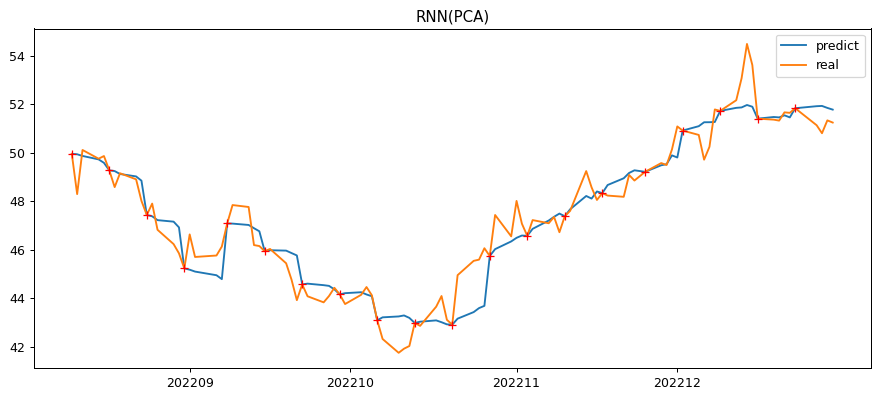

In [110]:
# The result for diff price prediction and recover to origin price
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12,5))
date = pd.to_datetime(pfizer.iloc[:, 0])

"""每五天用真实值修正：30天预测5天，对预测值每隔五个选取一次，每次使用预测值的全部五天"""
y_pred = np.zeros(100)
for i in range(0, 100, 5):
    for j in range(1, 5):
        y_pred[i] = price.iloc[-100+i]
        y_pred[i+j] = y_pred[i] + np.sum(preds_test_de[116+i, :j])
        #y_pred[i+j] = y_pred[i] + np.sum(preds_test_de[116+i, :j])
#y_pred[0] = value.iloc[-217]+preds_test_de[0, 0]
#y_pred[1] = value.iloc[-217]+preds_test_de[0, 1]
ax.plot(date[-100:], y_pred, label='predict')
ax.plot(date[-100:], price[-100:], label='real')
#ax.plot(date[-100:], preds_test[:, 0], label='predict')
#ax.plot(date[-100:], test_y[-100:, 0], label='real')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[8,9,10,11,12], interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y%m'))
reidx = np.arange(0, 100, 5)
plt.plot(date[1409+reidx], y_pred[0+reidx], '+', color='red')
plt.title("RNN(PCA)")
ax.legend()
plt.show()
#plt.savefig('RNN.png',bbox_inches='tight') # for saving picture

In [111]:
# Evaluate the value between price and the recover price by the prediction diff price
print("Evaluations for test data")
print("r2:%.3f"%metrics.r2_score(price[-100:], y_pred))
print('MAE:', metrics.mean_absolute_error(price[-100:], y_pred))
print('MSE:', metrics.mean_squared_error(price[-100:], y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(price[-100:], y_pred)))

Evaluations for test data
r2:0.918
MAE: 0.5791529992293407
MSE: 0.7109183984943803
RMSE: 0.8431597704435265


In [6]:
window_size = 30 # update to observe 30 data point
predict_size = 5
batch_size = 32
epoch = 1000
y_norm = normal_price # predict the origin price directly
X = features
X = np.hstack((y_norm,X))
test_y, preds, preds_test = rnn_model(X=X, y=y_norm, batch_size=batch_size, epoch=epoch, window_size=window_size, predict_size=predict_size)

2023-05-04 15:12:23.735576: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                5504      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 5,829
Trainable params: 5,829
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
40/40 [==============================] - 2s 7ms/step - loss: 0.0432
Epoch 2/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0265
Epoch 3/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.0235
Epoch 4/1000
40/40 [==============================] - 0s 8ms/step - loss: 0

40/40 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 92/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 93/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 94/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 95/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 96/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 97/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 98/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 99/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 100/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 101/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 102/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 103/1000
40/40 [=====

40/40 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 190/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 191/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 192/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 193/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 194/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 195/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 196/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 197/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 198/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 199/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 200/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 201/1000
40/4

Epoch 287/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.8850e-04
Epoch 288/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.7275e-04
Epoch 289/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 290/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 291/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.7514e-04
Epoch 292/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.6790e-04
Epoch 293/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 294/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.8693e-04
Epoch 295/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 296/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.6618e-04
Epoch 297/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.9167e-04
Epoch 298/1000
40/40 [==============================] - 0s 

40/40 [==============================] - 0s 6ms/step - loss: 9.0161e-04
Epoch 382/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.0543e-04
Epoch 383/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.8758e-04
Epoch 384/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.2329e-04
Epoch 385/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.9616e-04
Epoch 386/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.5438e-04
Epoch 387/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.2582e-04
Epoch 388/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.1855e-04
Epoch 389/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.0546e-04
Epoch 390/1000
40/40 [==============================] - 0s 6ms/step - loss: 9.1237e-04
Epoch 391/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.9783e-04
Epoch 392/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 6ms/step - loss: 8.3118e-04
Epoch 476/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.2181e-04
Epoch 477/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.8576e-04
Epoch 478/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.1321e-04
Epoch 479/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.7482e-04
Epoch 480/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.3531e-04
Epoch 481/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.3945e-04
Epoch 482/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.5779e-04
Epoch 483/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.6457e-04
Epoch 484/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.1917e-04
Epoch 485/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.7344e-04
Epoch 486/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 6ms/step - loss: 8.0683e-04
Epoch 570/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.9955e-04
Epoch 571/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.1267e-04
Epoch 572/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.1129e-04
Epoch 573/1000
40/40 [==============================] - 0s 7ms/step - loss: 7.9265e-04
Epoch 574/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.4746e-04
Epoch 575/1000
40/40 [==============================] - 0s 6ms/step - loss: 8.1108e-04
Epoch 576/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.5962e-04
Epoch 577/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.7923e-04
Epoch 578/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.7932e-04
Epoch 579/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.8860e-04
Epoch 580/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 6ms/step - loss: 7.5354e-04
Epoch 664/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.2167e-04
Epoch 665/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.2024e-04
Epoch 666/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.1858e-04
Epoch 667/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.2264e-04
Epoch 668/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.0546e-04
Epoch 669/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.1329e-04
Epoch 670/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.4284e-04
Epoch 671/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.6005e-04
Epoch 672/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.1100e-04
Epoch 673/1000
40/40 [==============================] - 0s 6ms/step - loss: 7.3359e-04
Epoch 674/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 9ms/step - loss: 6.8116e-04
Epoch 758/1000
40/40 [==============================] - 0s 7ms/step - loss: 6.9468e-04
Epoch 759/1000
40/40 [==============================] - 0s 7ms/step - loss: 6.8330e-04
Epoch 760/1000
40/40 [==============================] - 0s 7ms/step - loss: 7.0614e-04
Epoch 761/1000
40/40 [==============================] - 0s 8ms/step - loss: 7.0046e-04
Epoch 762/1000
40/40 [==============================] - 0s 8ms/step - loss: 6.9648e-04
Epoch 763/1000
40/40 [==============================] - 0s 7ms/step - loss: 7.1869e-04
Epoch 764/1000
40/40 [==============================] - 0s 8ms/step - loss: 7.0091e-04
Epoch 765/1000
40/40 [==============================] - 0s 8ms/step - loss: 6.7122e-04
Epoch 766/1000
40/40 [==============================] - 0s 7ms/step - loss: 6.8241e-04
Epoch 767/1000
40/40 [==============================] - 0s 8ms/step - loss: 6.6022e-04
Epoch 768/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 7ms/step - loss: 6.3202e-04
Epoch 852/1000
40/40 [==============================] - 0s 6ms/step - loss: 6.4766e-04
Epoch 853/1000
40/40 [==============================] - 0s 6ms/step - loss: 6.5117e-04
Epoch 854/1000
40/40 [==============================] - 0s 6ms/step - loss: 6.3304e-04
Epoch 855/1000
40/40 [==============================] - 0s 6ms/step - loss: 6.6959e-04
Epoch 856/1000
40/40 [==============================] - 0s 6ms/step - loss: 6.3127e-04
Epoch 857/1000
40/40 [==============================] - 0s 6ms/step - loss: 6.3244e-04
Epoch 858/1000
40/40 [==============================] - 0s 6ms/step - loss: 6.2706e-04
Epoch 859/1000
40/40 [==============================] - 0s 6ms/step - loss: 6.6359e-04
Epoch 860/1000
40/40 [==============================] - 0s 6ms/step - loss: 6.8047e-04
Epoch 861/1000
40/40 [==============================] - 0s 6ms/step - loss: 6.5647e-04
Epoch 862/1000
40/40 [==============================] - 0s

40/40 [==============================] - 0s 6ms/step - loss: 5.9921e-04
Epoch 946/1000
40/40 [==============================] - 0s 6ms/step - loss: 5.8549e-04
Epoch 947/1000
40/40 [==============================] - 0s 6ms/step - loss: 6.1845e-04
Epoch 948/1000
40/40 [==============================] - 0s 6ms/step - loss: 5.9922e-04
Epoch 949/1000
40/40 [==============================] - 0s 6ms/step - loss: 6.2313e-04
Epoch 950/1000
40/40 [==============================] - 0s 6ms/step - loss: 5.7844e-04
Epoch 951/1000
40/40 [==============================] - 0s 6ms/step - loss: 5.7649e-04
Epoch 952/1000
40/40 [==============================] - 0s 6ms/step - loss: 5.9189e-04
Epoch 953/1000
40/40 [==============================] - 0s 6ms/step - loss: 5.7705e-04
Epoch 954/1000
40/40 [==============================] - 0s 6ms/step - loss: 5.9157e-04
Epoch 955/1000
40/40 [==============================] - 0s 8ms/step - loss: 5.8943e-04
Epoch 956/1000
40/40 [==============================] - 0s

In [7]:
# Denormalized
normal_price = scaler.fit_transform(np.array(price).reshape(-1,1))
test_y = test_y.squeeze() # Delete a tensor with dimension size 1
test_y_de = scaler.inverse_transform(test_y)
preds_test_de = scaler.inverse_transform(preds_test)
# preds_test_de.shape

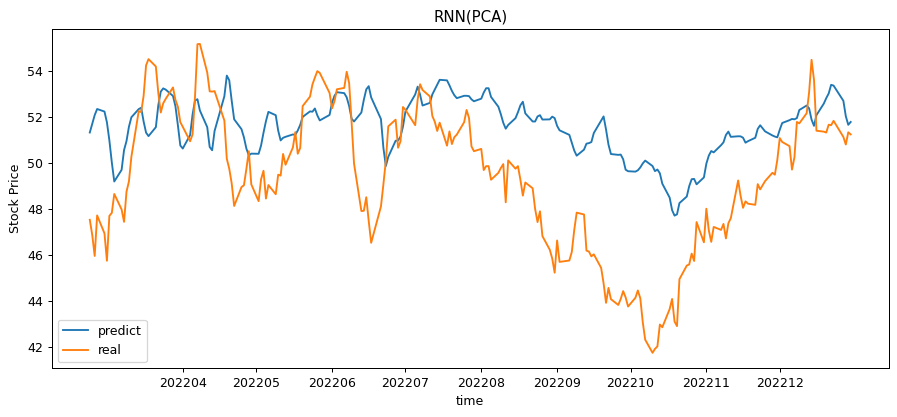

In [14]:
# The result for origin price prediction
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12,5))
date = pd.to_datetime(pfizer.iloc[:, 0])
# y_pred = [value.iloc[-100]+np.sum(preds_test_de[:i,0]) for i in range(117,217)]

ax.plot(date[-217:], preds_test_de[:, 0], label='predict')
ax.plot(date[-217:], price[-217:], label='real')
#ax.plot(date[-100:], preds_test[:, 0], label='predict')
#ax.plot(date[-100:], test_y[-100:, 0], label='real')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[4,5,6,7,8,9,10,11,12], interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y%m'))
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Stock Price")
plt.title("RNN(PCA)")
plt.savefig('RNN.png',bbox_inches='tight') # for saving picture
plt.show()

In [16]:
print("Evaluations for test data")
print("r2:%.3f"%metrics.r2_score(price[-217:], preds_test_de[:, 0]))
print('MAE:', metrics.mean_absolute_error(price[-217:], preds_test_de[:, 0]))
print('MSE:', metrics.mean_squared_error(price[-217:], preds_test_de[:, 0]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(price[-217:], preds_test_de[:, 0])))

Evaluations for test data
r2:-0.189
MAE: 2.699140443154612
MSE: 11.151202367038746
RMSE: 3.339341606819935
